In [1]:
import pandas as pd

In [6]:
# шаг 1
# names = 'Name1 Surname1, Name2 Surname2, Name3 Surname3, Name4 Surname4'
names_list = names.split(', ')
# names_list

['Name1 Surname1', 'Name2 Surname2', 'Name3 Surname3', 'Name4 Surname4']

In [10]:
df = pd.DataFrame({'client_id': [9002, 6722, 8799, 8737, 5208], 'sex': [1, 1, 1, 0, 0], 'wealth': ['medium', 'high', 'high', 'low', 'medium'], 'age': [63, 54, 62, 54, 37]})

In [40]:
df.columns

Index(['client_id', 'sex', 'wealth', 'age', 'older_than_30'], dtype='object')

In [20]:
# шаг 2
medium_35 = df.query("wealth == 'medium' and age > 35")

In [33]:
# шаг 3
# df = pd.DataFrame({'Клиент id': [9002, 6722, 8799, 8737, 5208], 'Пол': [1, 1, 1, 0, 0], 'Благосостояние': ['medium', 'high', 'high', 'low', 'medium'], 'Возраст': [63, 54, 62, 54, 37]})
df = df.rename(columns={'Клиент id': 'client_id', 'Пол': 'sex', 'Благосостояние': 'wealth', 'Возраст': 'age'})

In [38]:
# шаг 4
df['older_than_30'] = df.age > 30

In [51]:
# шаг 5
unique_num = df.nunique()

In [ ]:
# шаг 6
full_data = df.merge(data, on = 'client_id')

In [24]:
# шаг 7
def read_n_agg(path):
    df = pd.read_csv(path, sep=';').groupby('company').agg({'income': 'mean'})
    return df
# эти строки лишние, нужны только для самопроверки
# path = 'http://getfile.dokpub.com/yandex/get/http://disk.yandex.ru/d/ENe_6rjGLIFrcw'
# data = read_n_agg(path)
# data

,income
company,
En +,9.962187e+10
"АО «Александрова, Савельев и Мельникова»",7.206782e+10
АО «Андреев-Анисимов»,6.931948e+09
АО «Андреев-Макарова»,8.934380e+10
АО «Большаков Кошелева»,7.860861e+10
...,...
Щекиноазот,4.309092e+10
Щукин Лимитед,6.703036e+10
Эйвон Бьюти Продактс Компани (Avon),2.503657e+10


In [1]:
# шаг 8
import pandas as pd
path_to_file = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-bykov/lesson_3/3_taxi_peru.csv'
taxi = pd.read_csv(path_to_file, sep=';', parse_dates=['start_at', 'end_at', 'arrived_at'])

In [2]:
taxi.shape

(23111, 19)

In [3]:
# шаг 9
round(taxi.groupby('source').agg({'user_id': 'count'}) / 231.11)

,user_id
source,
Android,21.0
Wap,1.0
iPad,2.0
iPhone,42.0
web,33.0


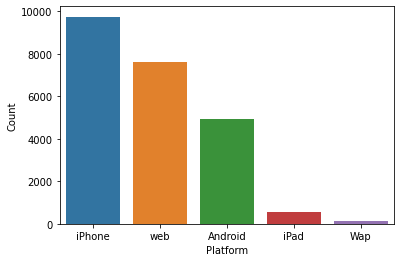

In [3]:
# шаг 10
import seaborn as sns
platform = (taxi.groupby('source', as_index=False)
            .agg({'user_id': 'count'})
            .rename(columns={'source': 'Platform', 'user_id': 'Count'})
           .sort_values('Count', ascending=False))
ax = sns.barplot(x="Platform", y="Count", data=platform)

In [4]:
platform

,Platform,Count
3,iPhone,9741
4,web,7631
0,Android,4909
2,iPad,571
1,Wap,136


/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


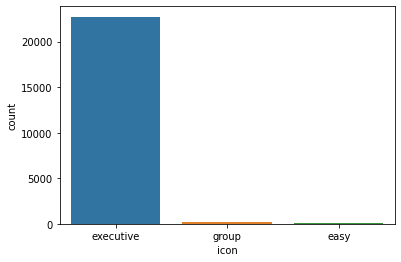

In [6]:
# шаг 11
# передаем в функцию только аргумент для оси X, а кол-во значений для Y она считает сама
sns.countplot(taxi['icon'])

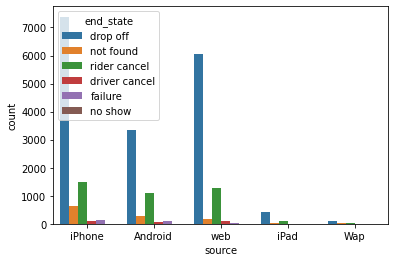

In [5]:
# шаг 12
sns.countplot(x='source', hue='end_state', data=taxi)

In [7]:
# шаг 13
# использование groupby и agg избыточно, достаточно взять нужную колонку driver_score
# применение reset_index автоматически превращает колонку=серию в датафрейм
driver_score_counts = taxi.driver_score.value_counts(normalize=True) \
    .mul(100).round(2).reset_index() \
    .rename(columns={'index': 'driver_score', 'driver_score': 'percentage'}) \
    .sort_values('driver_score')
driver_score_counts

,driver_score,percentage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


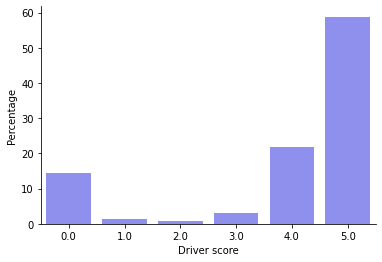

In [9]:
# шаг 14
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

In [10]:
# шаг 15
# использование groupby и agg избыточно, достаточно взять нужную колонку rider_score
# применение reset_index автоматически превращает колонку=серию в датафрейм
rider_score_counts = taxi.rider_score.value_counts(normalize=True) \
    .mul(100).round(2).reset_index() \
    .rename(columns={'index': 'rider_score', 'rider_score': 'percentage'}) \
    .sort_values('rider_score')
rider_score_counts

,rider_score,percentage
2,0.0,2.29
4,1.0,0.21
5,2.0,0.19
3,3.0,1.38
1,4.0,8.83
0,5.0,87.10
